**Reading the File and Checking the dimension of dataset**

In [241]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

app=pd.read_csv(r"C:\Users\psaini13\Downloads\EDA Case Study\application_data.csv")
app.shape

(307511, 122)

In [242]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Missing Values Handling**

**Checking the percent of null values in each column and deleting the columns having null values greater than 35%**

In [243]:
null_value=app.isnull().sum()[app.isnull().sum()*100//len(app)>35]*100//len(app)
null_value.sort_values(inplace=True)
null_value

EMERGENCYSTATE_MODE             47
YEARS_BEGINEXPLUATATION_MEDI    48
YEARS_BEGINEXPLUATATION_AVG     48
TOTALAREA_MODE                  48
YEARS_BEGINEXPLUATATION_MODE    48
FLOORSMAX_MEDI                  49
FLOORSMAX_MODE                  49
FLOORSMAX_AVG                   49
ENTRANCES_MEDI                  50
APARTMENTS_MODE                 50
APARTMENTS_MEDI                 50
WALLSMATERIAL_MODE              50
LIVINGAREA_AVG                  50
ENTRANCES_MODE                  50
LIVINGAREA_MODE                 50
ENTRANCES_AVG                   50
HOUSETYPE_MODE                  50
APARTMENTS_AVG                  50
LIVINGAREA_MEDI                 50
ELEVATORS_MODE                  53
ELEVATORS_AVG                   53
ELEVATORS_MEDI                  53
NONLIVINGAREA_MODE              55
NONLIVINGAREA_AVG               55
NONLIVINGAREA_MEDI              55
EXT_SOURCE_1                    56
BASEMENTAREA_AVG                58
BASEMENTAREA_MODE               58
BASEMENTAREA_MEDI   

**Plotting the columns which have null values greater than 35%**

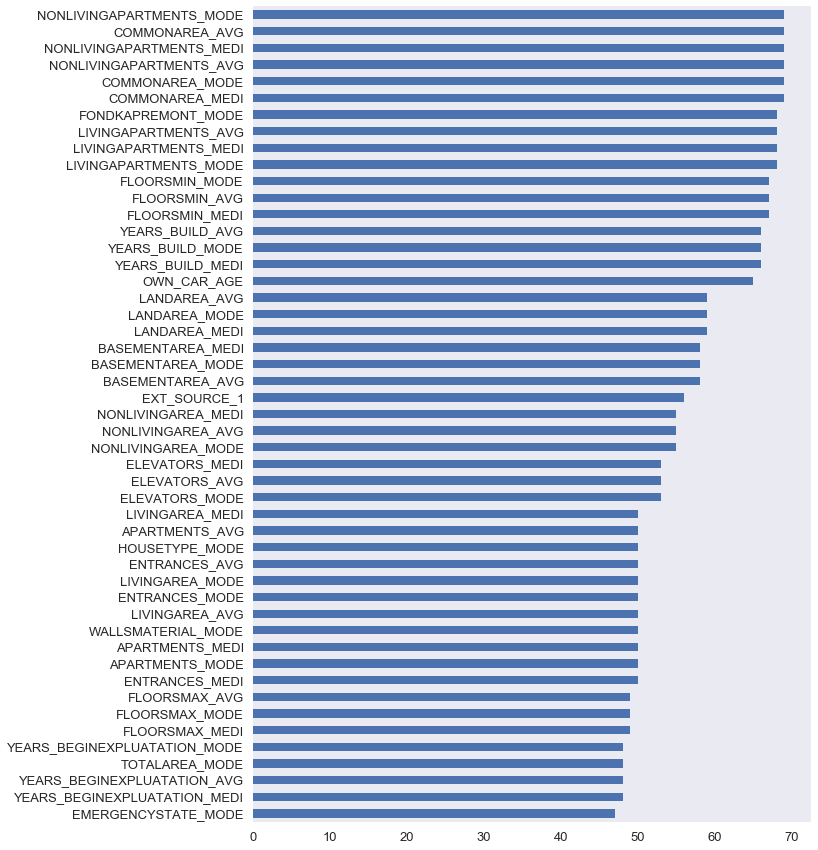

In [296]:
plt.figure(figsize=(10,15))
null_value.plot.barh()
plt.show()

In [245]:
len(null_value)

49

**There are 49 columns having null values greater than 35%, we cannot substitute these null values with any other value. We will drop these columns for better analysis. Here we are creating a new dataframe (app_new) without these columns for further analysis.**

In [246]:
columns_to_use=app.isnull().sum()[app.isnull().sum()*100//len(app)<35].index
app_new=app.loc[:,columns_to_use]
app_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Finding missing values in our new DataFrame**

In [247]:
app_new.isnull().sum()[app_new.isnull().sum()!=0]

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

There are multiple columns still having null values. Lets handle them one by one:
<br>**AMT_ANNUITY** -- We cannot replace NaN with zero as it cannot be zero, we will drop those 12 rows<br>


In [248]:
app_new.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

**AMT_GOODS_PRICE** -- We can replace the null values with mean as the data does not have outliers (mean and median are close)<br>
**NAME_TYPE_SUITE**  -- It tells who was accompanying the client, we can fill the null values with **Unaccompanied** <br>
**OCCUPATION_TYPE** -- Although there are large number of null values in these column but we will not drop it because it will be                        a important parameter for analysis. We can fill the null values with **Not Mentioned**

In [249]:
app_new=app_new[~app_new.AMT_ANNUITY.isnull()]

app_new['AMT_GOODS_PRICE'].fillna(app_new['AMT_GOODS_PRICE'].mean(),inplace=True)

app_new.NAME_TYPE_SUITE.fillna('Unaccompanied',inplace=True)

app_new.OCCUPATION_TYPE.fillna('Not Mentioned',inplace=True)

app_new.isnull().sum()[app_new.isnull().sum()!=0]


CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60964
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41518
AMT_REQ_CREDIT_BUREAU_DAY     41518
AMT_REQ_CREDIT_BUREAU_WEEK    41518
AMT_REQ_CREDIT_BUREAU_MON     41518
AMT_REQ_CREDIT_BUREAU_QRT     41518
AMT_REQ_CREDIT_BUREAU_YEAR    41518
dtype: int64

For **CNT_SOCIAL_CIRCLE** and **AMT_REQ_CREDIT** we will be replacing null values with 0 <br>
For **CNT_FAM_MEMBERS** we will be replacing nulls with 1 <br>
For **DAYS_LAST_PHONE_CHANGE** we will be replacing it with 1 assuming that phone is not changed

In [250]:
remove_null=list(app_new.isnull().sum()[app_new.isnull().sum()!=0].index)[3:]
remove_null.remove('DAYS_LAST_PHONE_CHANGE')
app_new[remove_null]=app_new[remove_null].fillna(0)

app_new.CNT_FAM_MEMBERS.fillna(1,inplace=True)

app_new.DAYS_LAST_PHONE_CHANGE.fillna(1,inplace=True)

app_new.isnull().sum()[app_new.isnull().sum()!=0]

EXT_SOURCE_2      660
EXT_SOURCE_3    60964
dtype: int64

To handle the **EXT_SCORE** we will average out from two columns and store in one and delete both the columns. And drop the records where both the scores are NaN <br>


In [251]:
app_new['EXT_SCORE']=app_new[['EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)
app_new=app_new[~app_new['EXT_SCORE'].isnull()]
app_new.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True,axis=1)

app_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SCORE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.201162
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738


In [252]:
app_new[app_new.CODE_GENDER=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SCORE
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,1,1,1,1,1,0,Not Mentioned,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.378740
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0,0.510012
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,7.0,1.0,7.0,1.0,-851.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.368085
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,-9649,-2293,-4099.0,-2326,1,1,1,1,1,0,Not Mentioned,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,10.0,4.0,10.0,4.0,-1681.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0,0.509616


The **CODE_GENDER** has four rows with XNA we can drop them

In [253]:
app_new=app_new[app_new.CODE_GENDER!='XNA']
app_new.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

**OUTLIERS**

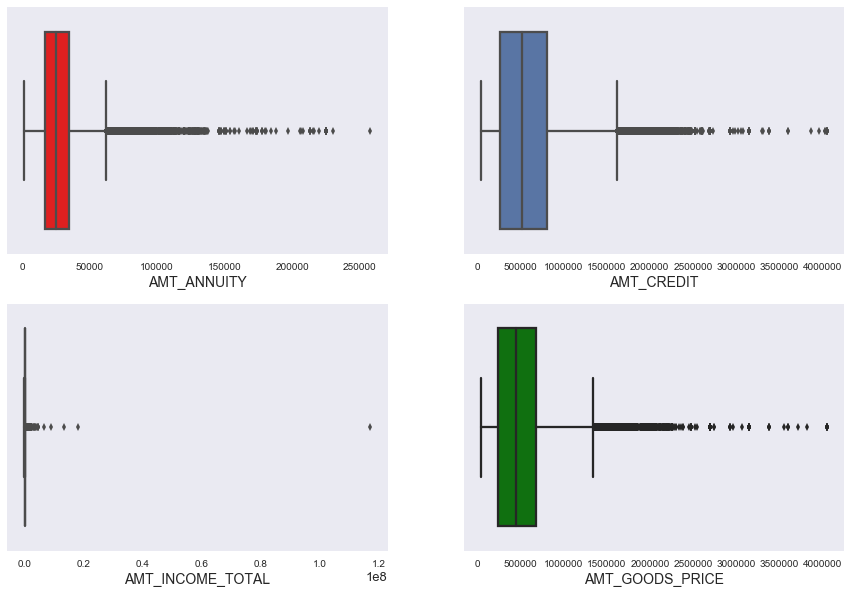

In [254]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(app_new.AMT_ANNUITY,color='red')
plt.xticks(fontsize=10)
plt.subplot(2,2,2)
sns.boxplot(app_new.AMT_CREDIT)
plt.xticks(fontsize=10)
plt.subplot(2,2,3)
sns.boxplot(app_new.AMT_INCOME_TOTAL)
plt.xticks(fontsize=10)
plt.subplot(2,2,4)
sns.boxplot(app_new.AMT_GOODS_PRICE,color='green')
plt.xticks(fontsize=10)
plt.show()

**To remove the above outliers we will take the values till 0.98 quantile for further analysis**

In [255]:
app_new=app_new[app_new['AMT_ANNUITY']<app_new['AMT_ANNUITY'].quantile(0.98)]
app_new=app_new[app_new['AMT_CREDIT']<app_new['AMT_CREDIT'].quantile(0.98)]
app_new=app_new[app_new['AMT_INCOME_TOTAL']<app_new['AMT_INCOME_TOTAL'].quantile(0.98)]
app_new=app_new[app_new['AMT_GOODS_PRICE']<app_new['AMT_GOODS_PRICE'].quantile(0.98)]


**REMOVING OUTLIERS AND PLOTTING AGAIN**

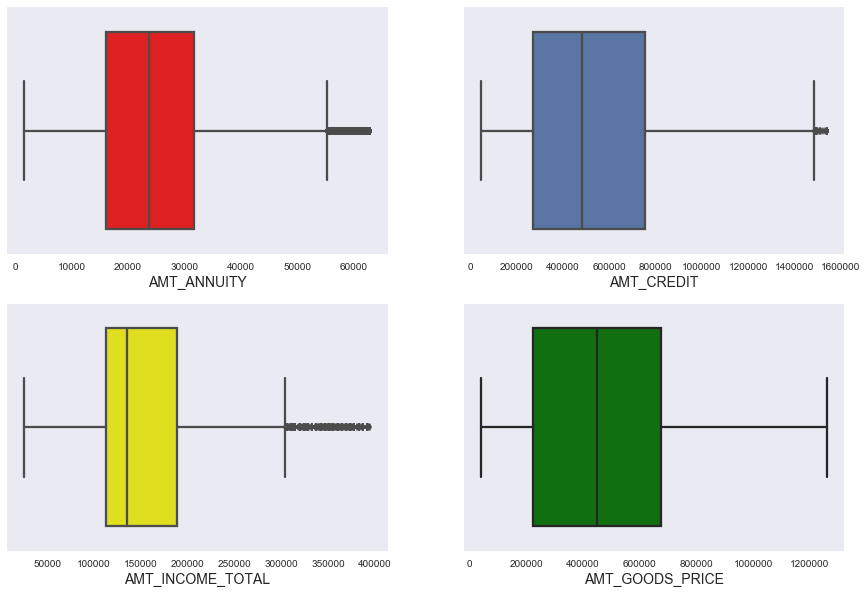

In [256]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(app_new.AMT_ANNUITY,color='red')
plt.xticks(fontsize=10)
plt.subplot(2,2,2)
sns.boxplot(app_new.AMT_CREDIT)
plt.xticks(fontsize=10)
plt.subplot(2,2,3)
sns.boxplot(app_new.AMT_INCOME_TOTAL,color='yellow')
plt.xticks(fontsize=10)
plt.subplot(2,2,4)
sns.boxplot(app_new.AMT_GOODS_PRICE,color='green')
plt.xticks(fontsize=10)
plt.show()

**After taking the 0.98 quantile of data, we again plotted the boxplot for the same attributes and can observe that a smaller number of outliers are left.**

**Univariate Analysis on complete data**

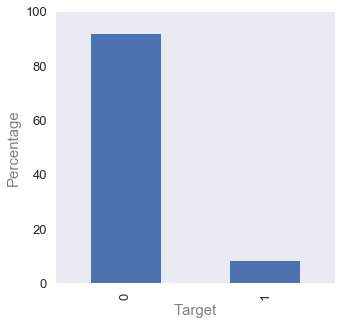

0    91.6408
1     8.3592
Name: TARGET, dtype: float64


In [257]:
plt.figure(figsize=(5,5))
(app_new.TARGET.value_counts(normalize=True)*100).plot.bar()

plt.yticks(range(0,120,20))
plt.ylabel('Percentage',fontsize=15,color='grey')
plt.xlabel('Target',fontsize=15,color='grey')
plt.show()
print(app_new.TARGET.value_counts(normalize=True)*100)

**Target 1 means client has faced payment difficulties, we can see 91.6% of the people does not face difficulties in payment<br> only 8.4% faces difficulty.** <br>
**Creating new columns like Age Group and Income Slab for better analysis**

In [258]:
app_new['Age_Group']=pd.cut((app_new['DAYS_BIRTH']//-365).values.tolist(),bins=[0,30,40,50,60,120],labels=['<30','30-40','40-50','50-60','60+'])
app_new['Income_Slab']=pd.cut(x=app_new.AMT_INCOME_TOTAL,bins=[0,50000,100000,200000,300000,400000],labels=['0-50K','50K-100K','100K-200K','200K-300K','300K+'])



**The ratio of the imbalance is calculated below (Ratio of imbalance = 10.96)**

In [259]:
non_defaulter=app_new[app_new.TARGET==0]
defaulter=app_new[app_new.TARGET==1]

print('Ratio of imbalance is = ',round(len(non_defaulter)/len(defaulter),2))

Ratio of imbalance is =  10.96


**Plotting Graphs for univariate analysis**

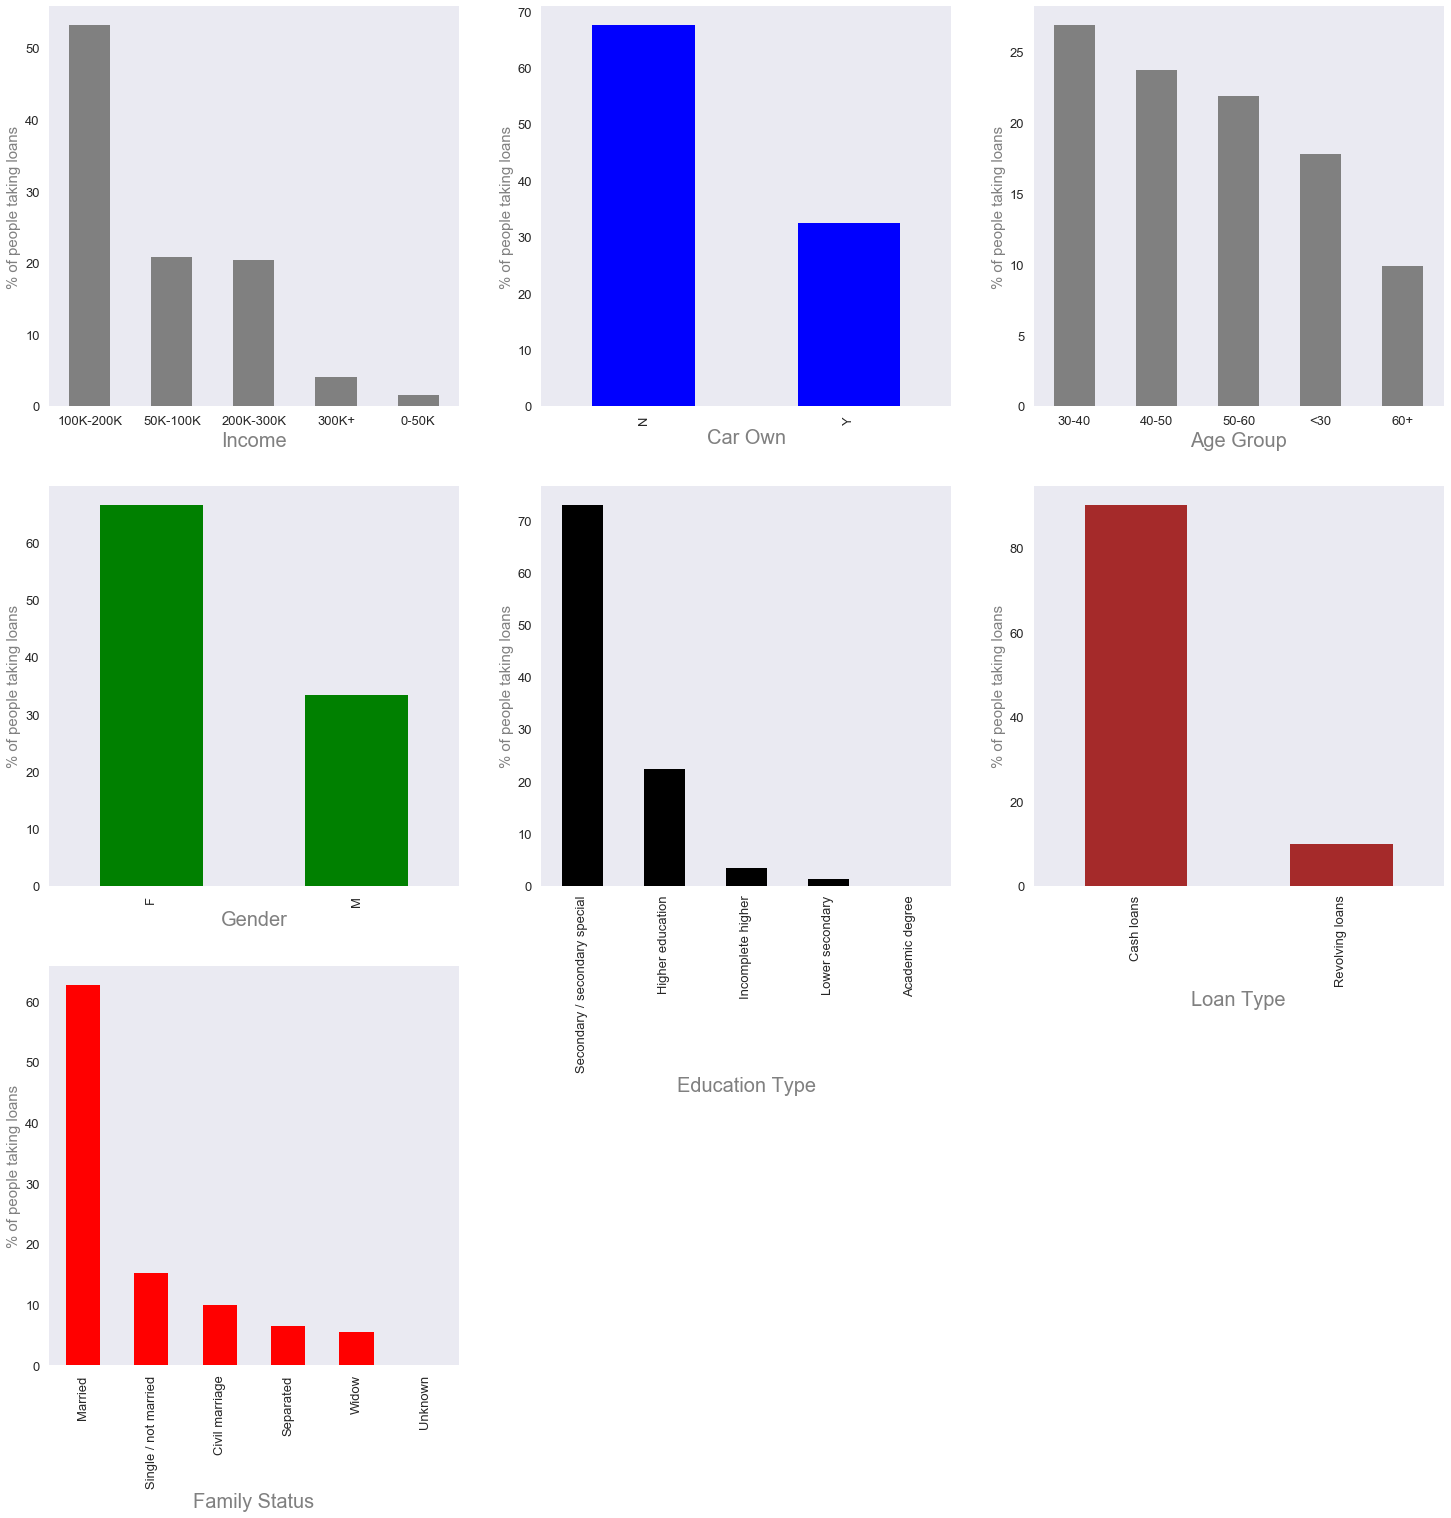

In [260]:
plt.figure(figsize=(25,25))
plt.subplot(3,3,4)
(app_new.CODE_GENDER.value_counts(normalize=True)*100).plot.bar(color='green')
plt.ylabel('% of people taking loans',fontsize=15,color='grey')
plt.xlabel('Gender',fontsize=20,color='grey')
plt.subplot(3,3,7)
(app_new.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('% of people taking loans',fontsize=15,color='grey')
plt.xlabel('Family Status',fontsize=20,color='grey')
plt.subplot(3,3,6)
(app_new.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar(color='brown')
plt.ylabel('% of people taking loans',fontsize=15,color='grey')
plt.xlabel('Loan Type',fontsize=20,color='grey')
plt.subplot(3,3,2)
(app_new.FLAG_OWN_CAR.value_counts(normalize=True)*100).plot.bar(color='blue')
plt.ylabel('% of people taking loans',fontsize=15,color='grey')
plt.xlabel('Car Own',fontsize=20,color='grey')
plt.subplot(3,3,5)
(app_new.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar(color='black')
plt.ylabel('% of people taking loans',fontsize=15,color='grey')
plt.xlabel('Education Type',fontsize=20,color='grey')
plt.subplot(3,3,3)
(app_new.Age_Group.value_counts(normalize=True)*100).plot.bar(color='grey')
plt.ylabel('% of people taking loans',fontsize=15,color='grey')
plt.xlabel('Age Group',fontsize=20,color='grey')
plt.xticks(rotation=0)
plt.subplot(3,3,1)
(app_new.Income_Slab.value_counts(normalize=True)*100).plot.bar(color='grey')
plt.ylabel('% of people taking loans',fontsize=15,color='grey')
plt.xlabel('Income',fontsize=20,color='grey')
plt.xticks(rotation=0)
plt.show()


Following can be deduced from above graphs :- <br>
**1. Females took more loans than males** <br>
**2. The people who does not own a car takes more loans** <br>
**3. People in their 30's take more loans** <br>
**4. Married people take more loans** <br>
**5. People having secondary education take more loans** <br>
**6. Maximum loans are given as Cash Loans**<br>
**7. People who earn too high or too less dont take loans, middle salaried people (100K-200K) tends to take more loans**

**DEFAULTERS (TARGET=1)**

**Univariate/Bivariate Analysis on Target =1 i.e. Defaulters**<br>
**Let's check out using univariate analysis basic details about the people who are defaulters**

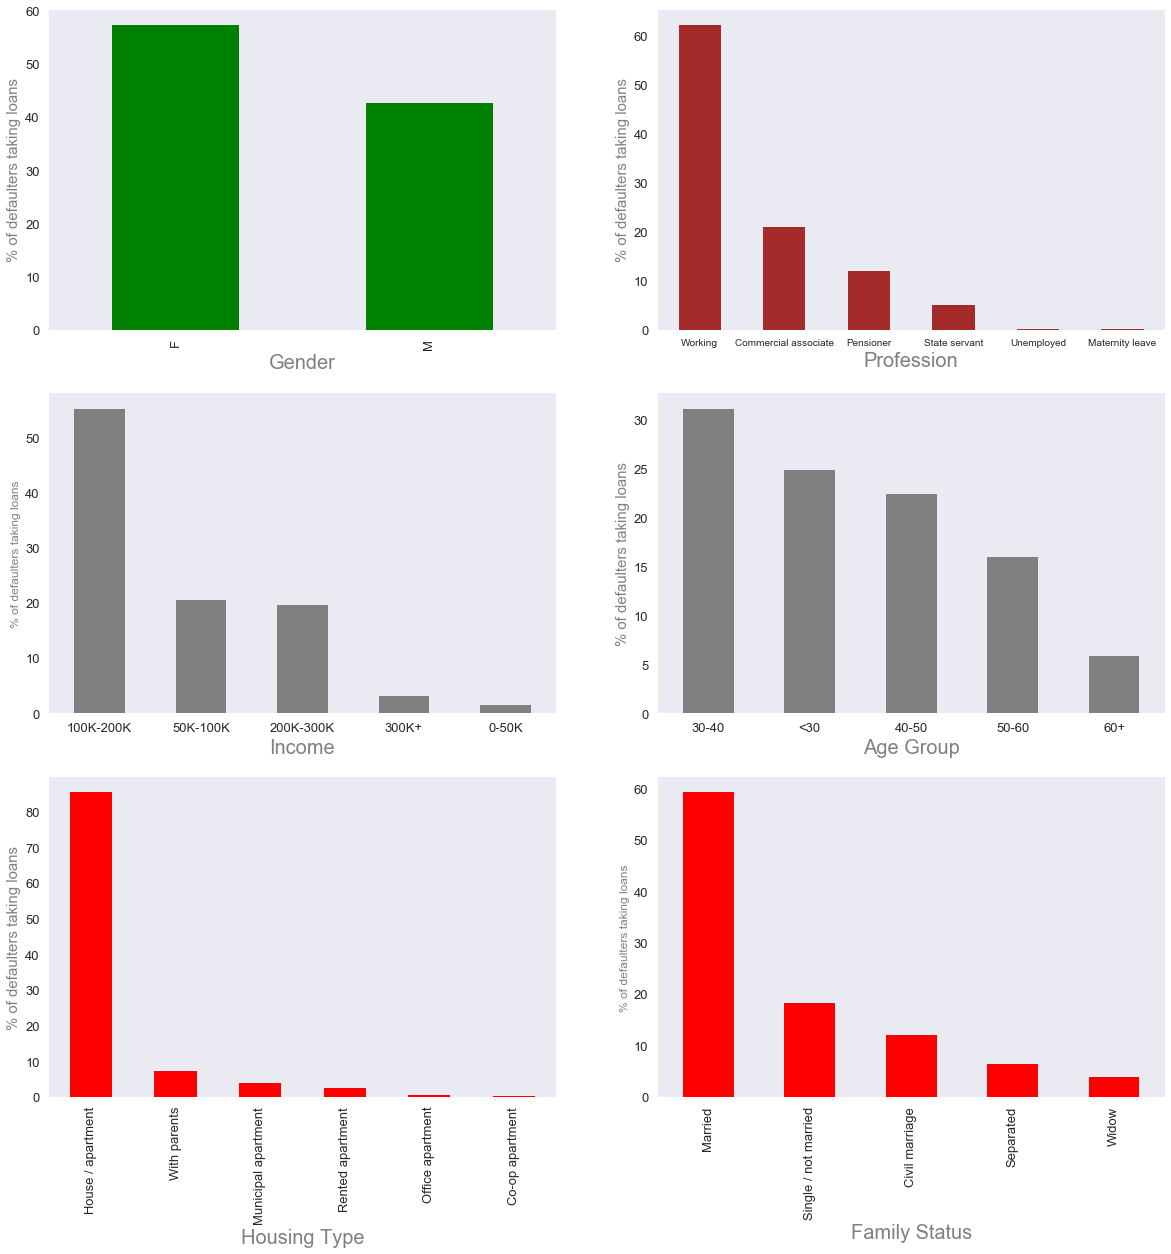

In [261]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
(defaulter.CODE_GENDER.value_counts(normalize=True)*100).plot.bar(color='green')
plt.ylabel('% of defaulters taking loans',fontsize=15,color='grey')
plt.xlabel('Gender',fontsize=20,color='grey')
plt.subplot(3,2,2)
(defaulter.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.bar(color='brown')
plt.ylabel('% of defaulters taking loans',fontsize=15,color='grey')
plt.xlabel('Profession',fontsize=20,color='grey')
plt.xticks(rotation=360,fontsize=10)
plt.subplot(3,2,5)
(defaulter.NAME_HOUSING_TYPE.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('% of defaulters taking loans',fontsize=15,color='grey')
plt.xlabel('Housing Type',fontsize=20,color='grey')
plt.subplot(3,2,4)
(defaulter.Age_Group.value_counts(normalize=True)*100).plot.bar(color='grey')
plt.ylabel('% of defaulters taking loans',fontsize=15,color='grey')
plt.xlabel('Age Group',fontsize=20,color='grey')
plt.xticks(rotation=360)
plt.subplot(3,2,3)
(defaulter.Income_Slab.value_counts(normalize=True)*100).plot.bar(color='grey')
plt.ylabel('% of defaulters taking loans',fontsize=12,color='grey')
plt.xlabel('Income',fontsize=20,color='grey')
plt.xticks(rotation=360)
plt.subplot(3,2,6)
(defaulter.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('% of defaulters taking loans',fontsize=12,color='grey')
plt.xlabel('Family Status',fontsize=20,color='grey')

plt.show()


**Conclusions:** <br> 1. Working people appear to be more number of defaulters <br> 2. People in age group 30-40 turn out to be maxiumum defaulters <br> 3. Females are more likely to be defaulters <br> 4. People having house/apartment are mostly defaulters <br> 5. Income range of 100-200K category results in maximum defaulters <br> 6.Married people turn out to be defaulters mostly.

**Creating one more Credit Slab to get better view of how much credit taken by the defaulters**

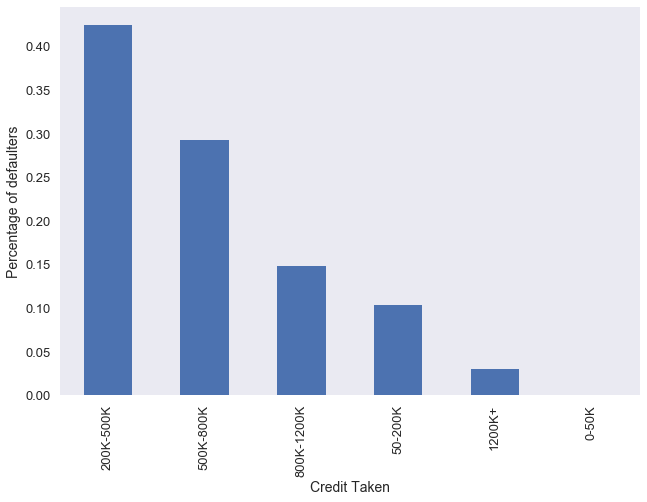

In [262]:

defaulter['Credit_Slab']=pd.cut(x=defaulter.AMT_CREDIT,bins=[0,50000,200000,500000,800000,1200000,1600000],labels=['0-50K','50-200K','200K-500K','500K-800K','800K-1200K','1200K+'])

defaulter['Credit_Slab'].value_counts(normalize=True).plot.bar()
plt.ylabel('Percentage of defaulters')
plt.xlabel('Credit Taken')
plt.show()


**People who take too high or too low credits are less likely to be defaulters whereas people taking credits between 200K-500K are more likely to be defaulters **

BiVariate Analysis to check what is the depenedency of different **categorical values** on the **credit amount** for **DEFAULTERS (Target=1)**

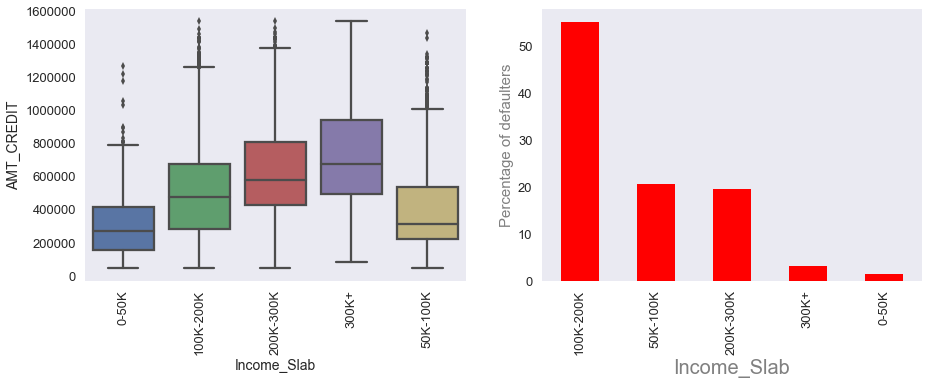

In [263]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=defaulter,x='Income_Slab',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(defaulter.Income_Slab.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('Percentage of defaulters',fontsize=15,color='grey')
plt.xlabel('Income_Slab',fontsize=20,color='grey')
plt.show()

Conclusion : Although majority of defaulters are from the income slab 100K-200K but the **defaulters from income slab 300K+ has taken more credit amount among all other income groups**

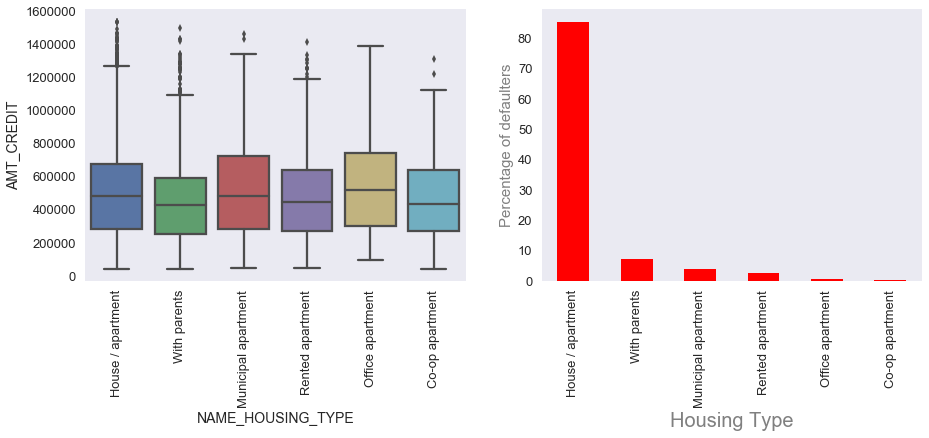

In [264]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=defaulter,x='NAME_HOUSING_TYPE',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(defaulter.NAME_HOUSING_TYPE.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('Percentage of defaulters',fontsize=15,color='grey')
plt.xlabel('Housing Type',fontsize=20,color='grey')
plt.show()

Conclusion: Although majority of defaulters are people who own House/Apartment but the **defaulters who lives in office apartment has taken more credit amount among all other housing types**

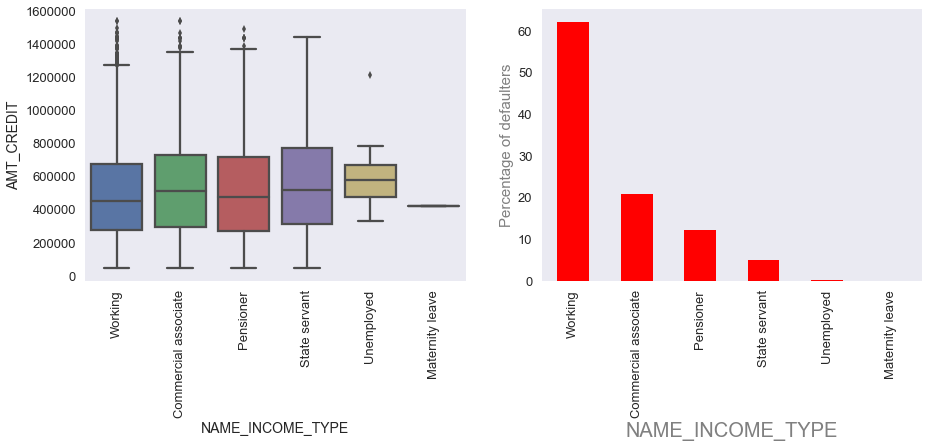

In [265]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=defaulter,x='NAME_INCOME_TYPE',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(defaulter.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('Percentage of defaulters',fontsize=15,color='grey')
plt.xlabel('NAME_INCOME_TYPE',fontsize=20,color='grey')
plt.show()

Conclusion: Although majority of defaulters are people who are working but the **defaulters who are unemployed has taken more credit amount among all other professions**

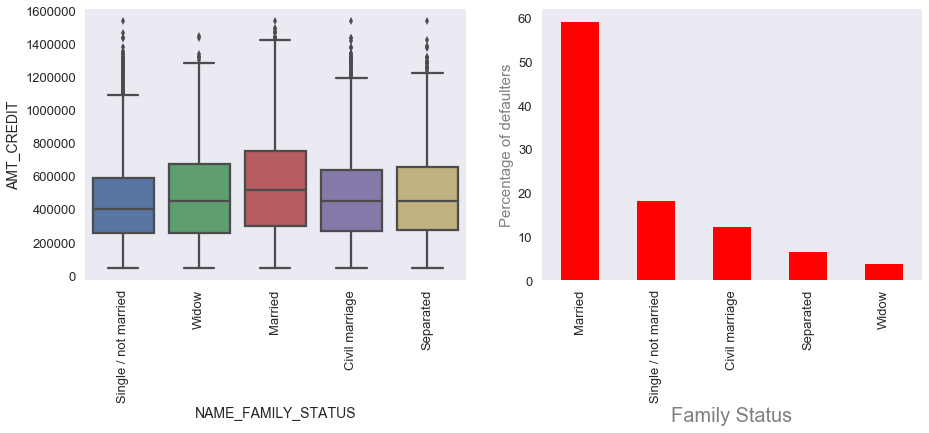

In [266]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=defaulter,x='NAME_FAMILY_STATUS',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(defaulter.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('Percentage of defaulters',fontsize=15,color='grey')
plt.xlabel('Family Status',fontsize=20,color='grey')
plt.show()

**Conclusion : Majority of defaulters are married and has also taken more credit amount than other categories of family status**

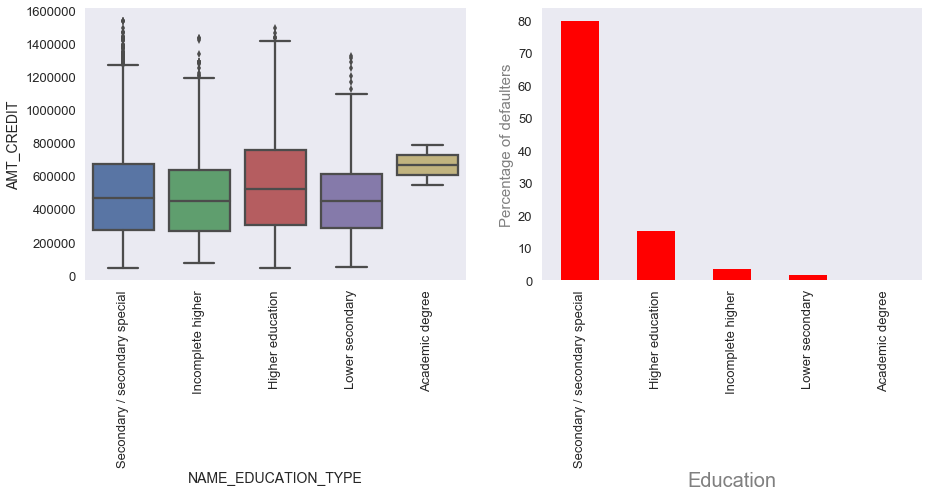

In [267]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=defaulter,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(defaulter.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('Percentage of defaulters',fontsize=15,color='grey')
plt.xlabel('Education',fontsize=20,color='grey')
plt.show()

CONCLUSION: Although majority of defaulters are people who have secondary/ secondary special but the **defaulters who have an Academic Degree has taken more credit amount among all other education types**

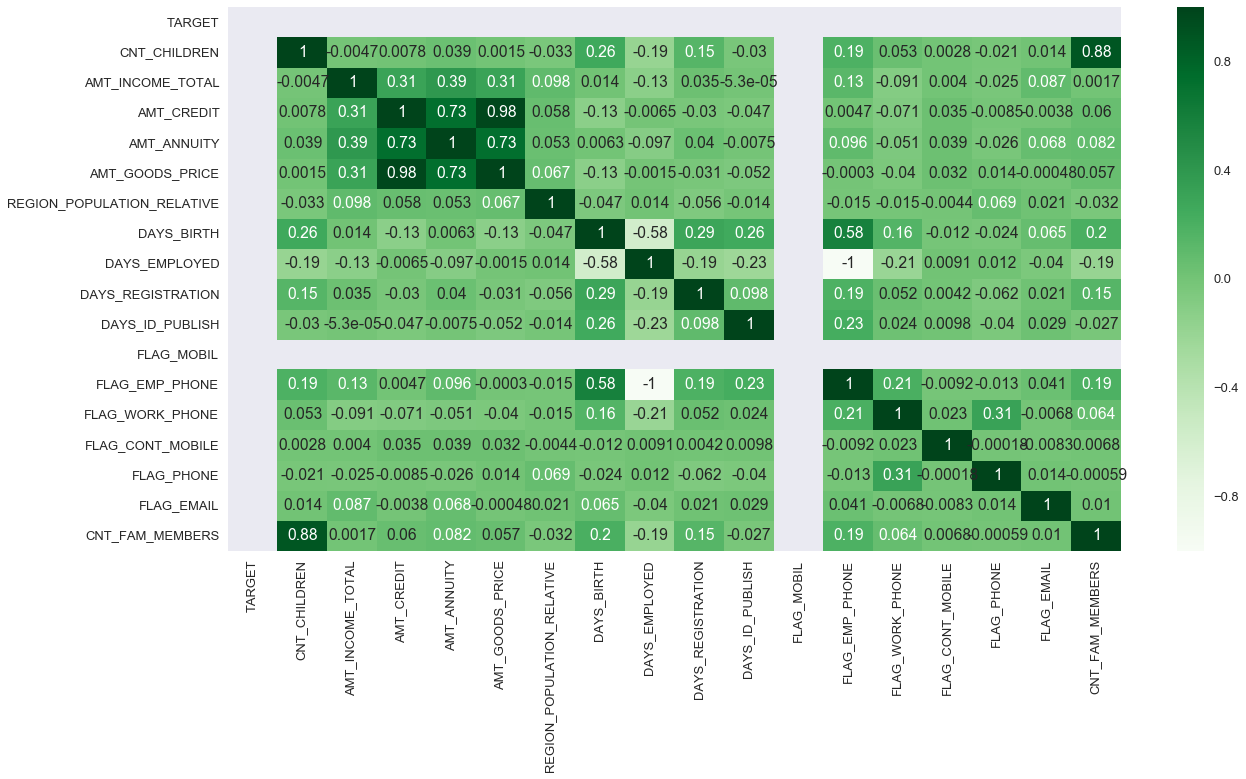

In [268]:
plt.figure(figsize=(20,10))
sns.heatmap(defaulter.corr().iloc[1:19,1:19],cmap='Greens',annot=True)
plt.show()

 TOP CORRELATIONS WITH VALUES
1.	AMT_CREDIT & AMT_GOODS_PRICE - 0.98
2.	REGION_RATING_CLIENT_W_CITY & REGION_RATING_CLIENT - 0.96
3.	CNT_CHILDREN & CNT_FAM_MEMBERS - 0.88
4.	DEF_30_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_CIRCLE - 0.87
5.	LIVE_REGION_NOT_WORK_REGION & REG_REGION_NOT_WORK_REGION - 0.85
6.	LIVE_CITY_NOT_WORK_CITY & REG_CITY_NOT_WORK_CITY - 0.78
7.	AMT_ANNUITY & AMT_CREDIT - 0.73
8.	AMT_GOODS_PRICE & AMT_ANNUITY - 0.73
9.	DAYS_EMPLOYED & FLAG_DOCUMENT_6 - 0.62
10.	DAYS_BIRTH & FLAG_EMP_PHONE - 0.58


**NON DEFAULTERS (TARGET=0)**

**Univariate/Bivariate Analysis on Target =0 i.e. Non Defaulters**<br>
**Let's check out using univariate analysis basic details about the people who are non defaulters**

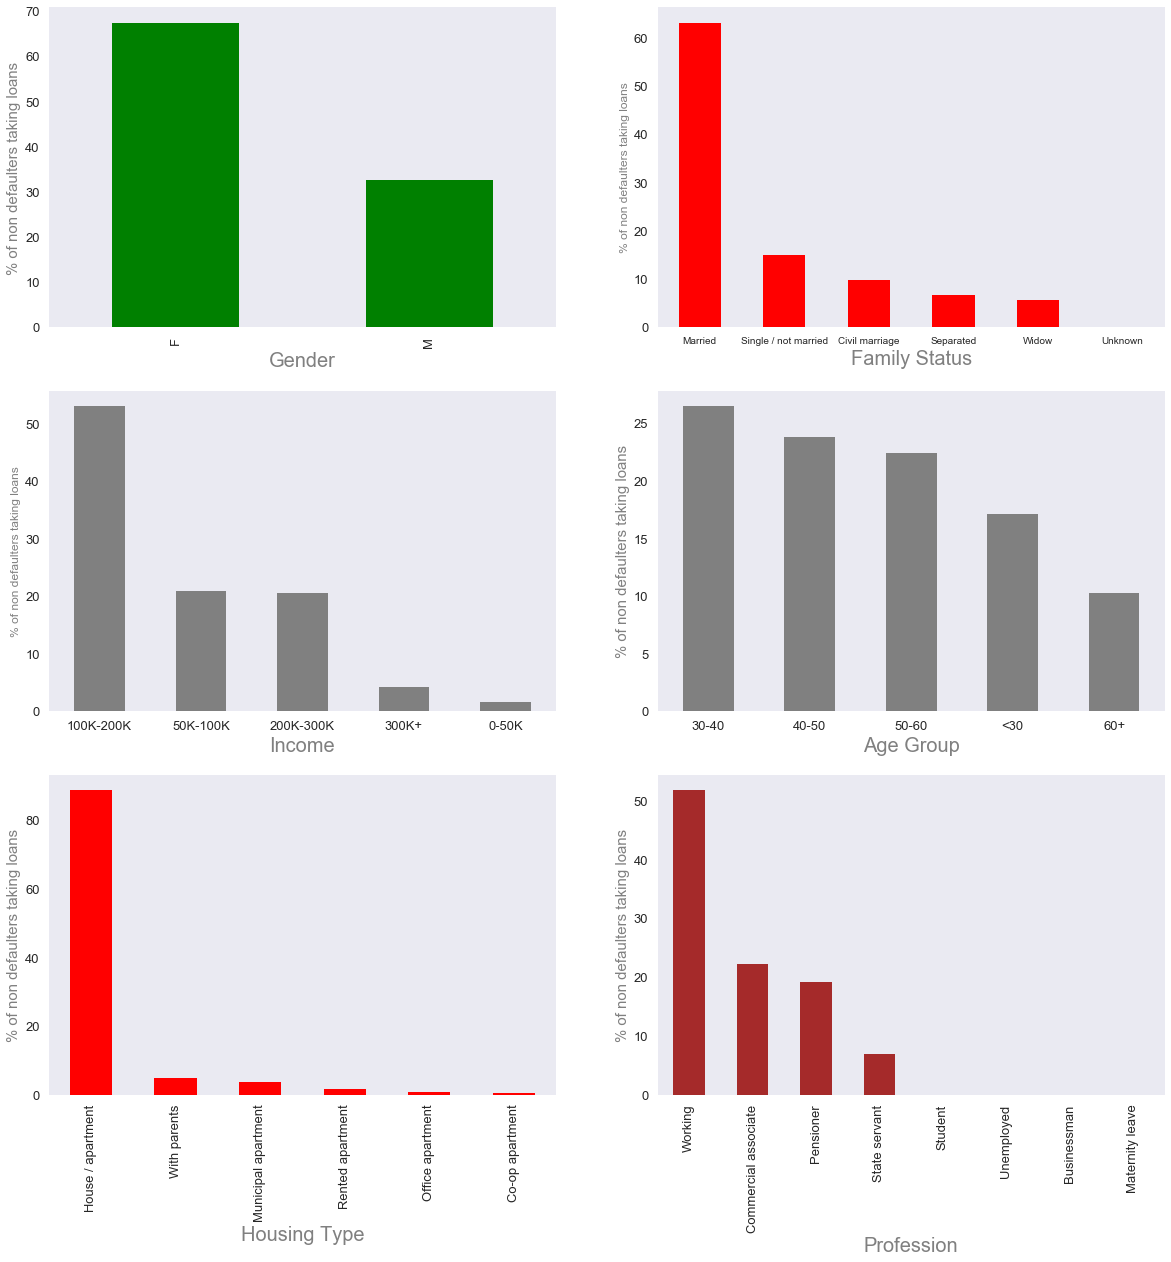

In [269]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
(non_defaulter.CODE_GENDER.value_counts(normalize=True)*100).plot.bar(color='green')
plt.ylabel('% of non defaulters taking loans',fontsize=15,color='grey')
plt.xlabel('Gender',fontsize=20,color='grey')
plt.subplot(3,2,6)
(non_defaulter.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.bar(color='brown')
plt.ylabel('% of non defaulters taking loans',fontsize=15,color='grey')
plt.xlabel('Profession',fontsize=20,color='grey')
plt.subplot(3,2,5)
(non_defaulter.NAME_HOUSING_TYPE.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('% of non defaulters taking loans',fontsize=15,color='grey')
plt.xlabel('Housing Type',fontsize=20,color='grey')
plt.subplot(3,2,4)
(non_defaulter.Age_Group.value_counts(normalize=True)*100).plot.bar(color='grey')
plt.ylabel('% of non defaulters taking loans',fontsize=15,color='grey')
plt.xlabel('Age Group',fontsize=20,color='grey')
plt.xticks(rotation=360)
plt.subplot(3,2,3)
(non_defaulter.Income_Slab.value_counts(normalize=True)*100).plot.bar(color='grey')
plt.ylabel('% of non defaulters taking loans',fontsize=12,color='grey')
plt.xlabel('Income',fontsize=20,color='grey')
plt.xticks(rotation=360)
plt.subplot(3,2,2)
(non_defaulter.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('% of non defaulters taking loans',fontsize=12,color='grey')
plt.xlabel('Family Status',fontsize=20,color='grey')
plt.xticks(rotation=360,fontsize=10)
plt.show()


**Conclusions:** <br> 1.Females are more likely to be non defaulter <br> 2. Working People turn out to be maxiumum non defaulters <br> 3.People having house/apartment are mostly non defaulters  <br> 4. People in the age group 30-40 are mostly non defaulters<br> 5. Income range of 100-200K category results in maximum non defaulters <br> 6.Married people turn out to be non defaulters mostly.

The above stats and inferences are very similar to the people who defaulted this shows that the data is highly biased for some<br> values like Gender, Profession of people, Living places of people, Age Group, Income range, Marital status etc.<br>
So univariate analysis for defaulters and no-defaulters does not give us much insight about what’s happening across the<br> variables analyzed because of biasness, let’s have bivariate analysis to have better understanding


**Creating one more Credit Slab to get better view of how much credit taken by the non defaulters**

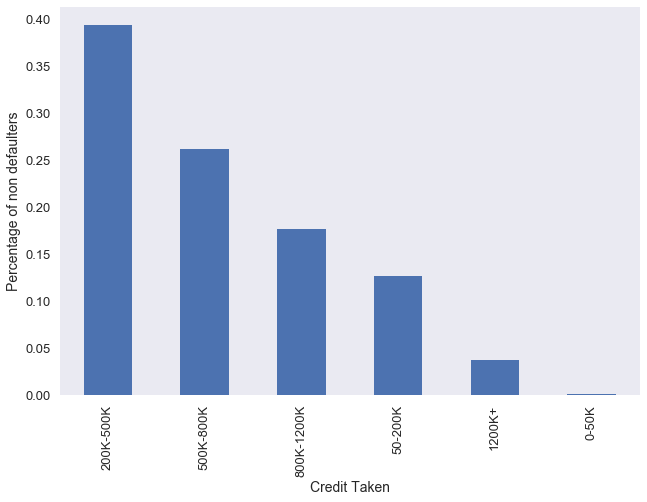

In [270]:

non_defaulter['Credit_Slab']=pd.cut(x=non_defaulter.AMT_CREDIT,bins=[0,50000,200000,500000,800000,1200000,1600000],labels=['0-50K','50-200K','200K-500K','500K-800K','800K-1200K','1200K+'])

non_defaulter['Credit_Slab'].value_counts(normalize=True).plot.bar()
plt.ylabel('Percentage of non defaulters')
plt.xlabel('Credit Taken')
plt.show()


**Conclusion : People who take too high or too low credits are less likely to be non defaulters whereas people taking credits between 200K-500K are more likely to be non defaulters **

**BiVariate Analysis** to check what is the depenedency of different **categorical values** on the **credit amount** for **NON DEFAULTERS (Target=0)**

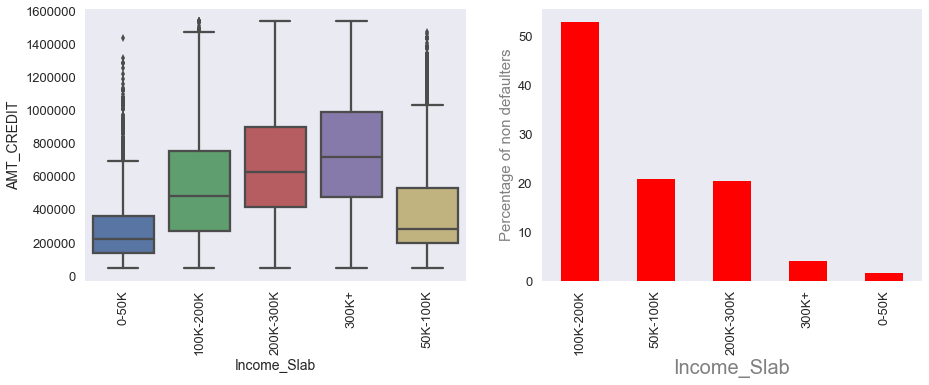

In [271]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=non_defaulter,x='Income_Slab',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(non_defaulter.Income_Slab.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('Percentage of non defaulters',fontsize=15,color='grey')
plt.xlabel('Income_Slab',fontsize=20,color='grey')
plt.show()

Conclusion : Although majority of non defaulters are from the income slab 100K-200K but the **non defaulters from income slab 300K+ has taken more credit amount among all other income groups**

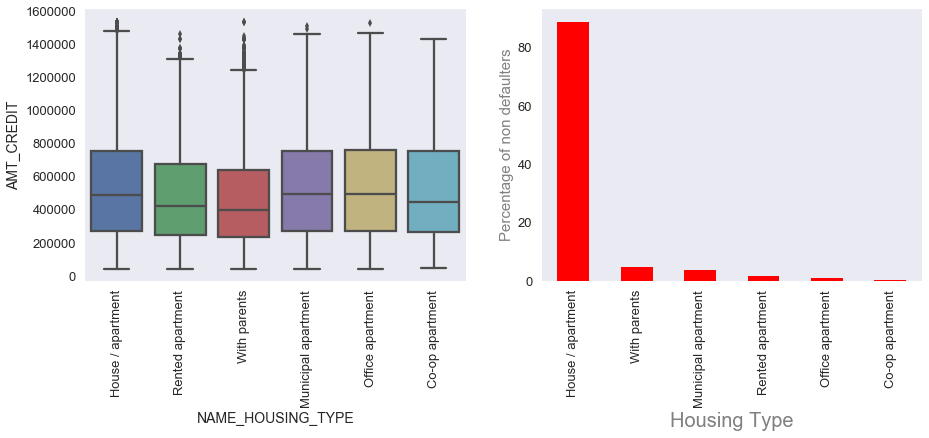

In [272]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=non_defaulter,x='NAME_HOUSING_TYPE',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(non_defaulter.NAME_HOUSING_TYPE.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('Percentage of non defaulters',fontsize=15,color='grey')
plt.xlabel('Housing Type',fontsize=20,color='grey')
plt.show()

In [273]:
non_defaulter.groupby('NAME_HOUSING_TYPE').median()['AMT_CREDIT']

NAME_HOUSING_TYPE
Co-op apartment        450000.00
House / apartment      490374.00
Municipal apartment    495985.50
Office apartment       498390.75
Rented apartment       421564.50
With parents           398016.00
Name: AMT_CREDIT, dtype: float64

Although majority of non-defaulters are people who own House/Apartment but the non-defaulters who lives in **office apartment(median of credit taken= 498390.75) or municipal (median of credit taken = 495985.50) or House/Apartment(median of credit taken =490374) has taken most credit amount and almost similar credit amount among all other housing types**

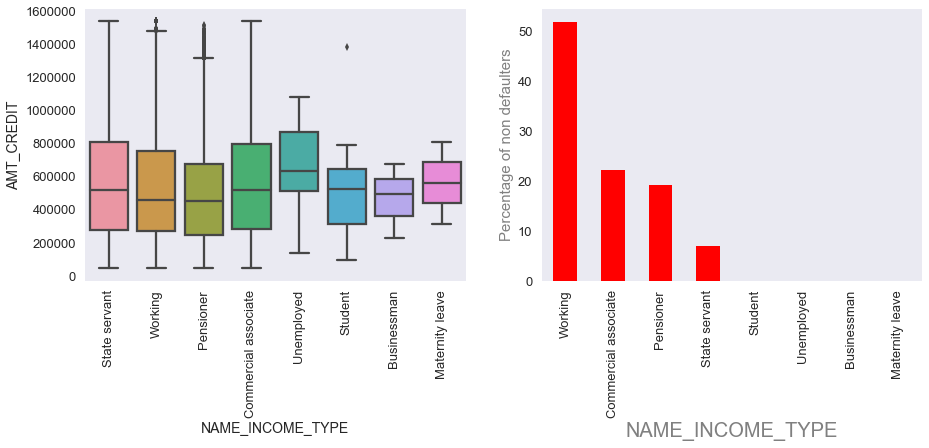

In [274]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=non_defaulter,x='NAME_INCOME_TYPE',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(non_defaulter.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('Percentage of non defaulters',fontsize=15,color='grey')
plt.xlabel('NAME_INCOME_TYPE',fontsize=20,color='grey')
plt.show()

Conclusion: Although majority of non defaulters are people who are **Working** still the **non defaulters who are unemployed has taken more credit amount among all other professions**

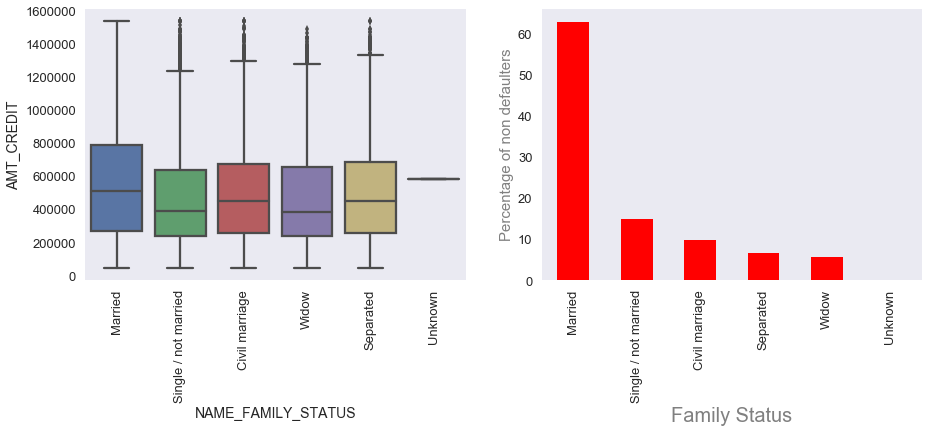

In [275]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=non_defaulter,x='NAME_FAMILY_STATUS',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(non_defaulter.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('Percentage of non defaulters',fontsize=15,color='grey')
plt.xlabel('Family Status',fontsize=20,color='grey')
plt.show()

**Conclusion : Majority of defaulters are married and has also taken more credit amount than other categories of family status**

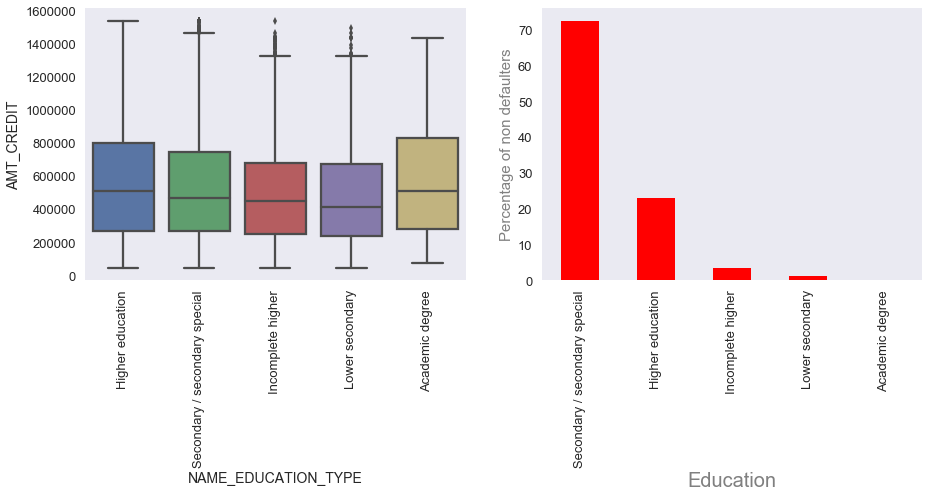

In [276]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=non_defaulter,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(non_defaulter.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar(color='red')
plt.ylabel('Percentage of non defaulters',fontsize=15,color='grey')
plt.xlabel('Education',fontsize=20,color='grey')
plt.show()

In [277]:
non_defaulter.groupby('NAME_EDUCATION_TYPE').median()['AMT_CREDIT']

NAME_EDUCATION_TYPE
Academic degree                  512446.5
Higher education                 508500.0
Incomplete higher                450000.0
Lower secondary                  412942.5
Secondary / secondary special    469152.0
Name: AMT_CREDIT, dtype: float64

CONCLUSION: Although majority of non defaulters are people who have secondary/ secondary special but the **non defaulters who have an Academic Degree(median=512446.5) or Higher Education(median=508500.0) has taken more credit amount among all other education types**

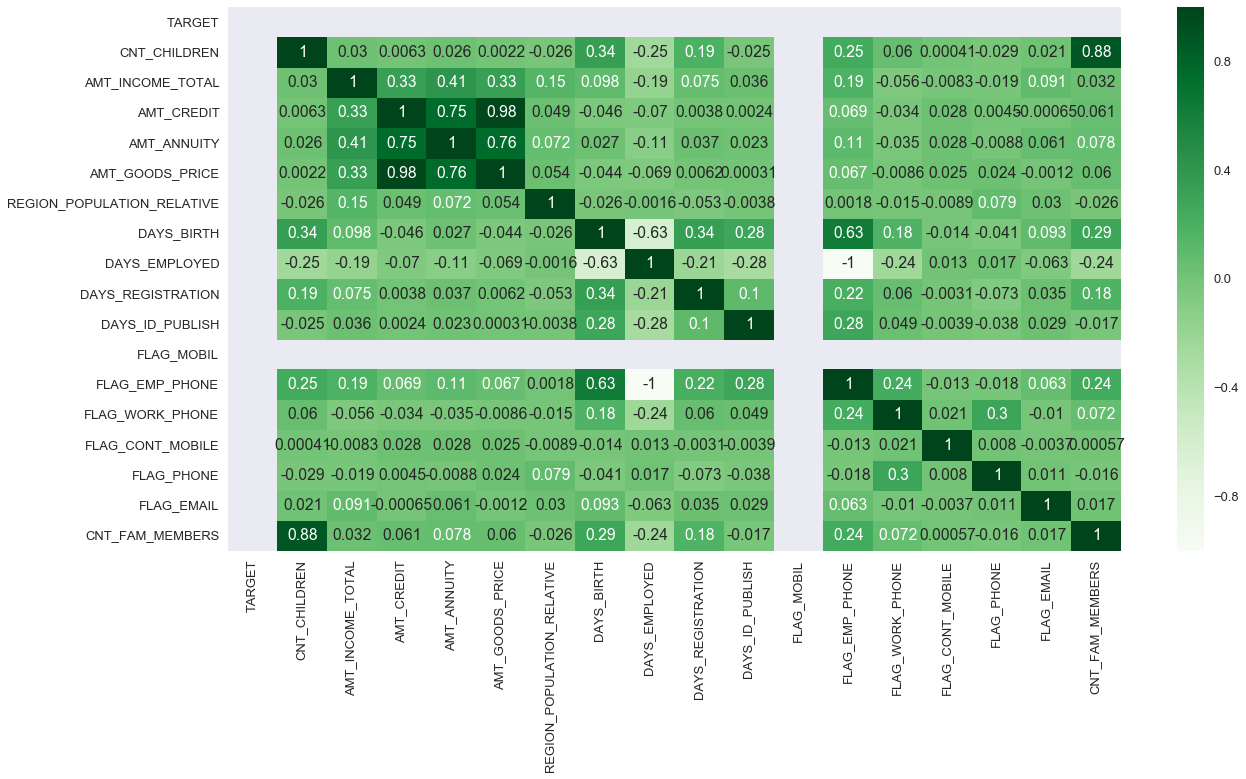

In [278]:
plt.figure(figsize=(20,10))
sns.heatmap(non_defaulter.corr().iloc[1:19,1:19],cmap='Greens',annot=True)
plt.show()

TOP CORRELATIONS:
1.	AMT_CREDIT & AMT_GOODS_PRICE - 0.98
2.	REGION_RATING_CLIENT_W_CITY & REGION_RATING_CLIENT - 0.95
3.	CNT_CHILDREN & CNT_FAM_MEMBERS - 0.88
4.	DEF_30_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_CIRCLE - 0.86
5.	LIVE_REGION_NOT_WORK_REGION & REG_REGION_NOT_WORK_REGION - 0.86
6.	LIVE_CITY_NOT_WORK_CITY & REG_CITY_NOT_WORK_CITY - 0.83
7.	AMT_ANNUITY & AMT_CREDIT - 0.75
8.	AMT_GOODS_PRICE & AMT_ANNUITY - 0.76
9.	DAYS_EMPLOYED & FLAG_DOCUMENT_6 - 0.60
10.	DAYS_BIRTH & FLAG_EMP_PHONE - 0.63 



 As we know correlation does not mean causation so some of the above relations may have a correlation but that does not mean both are dependent on each other.<br>
Following is the explanation of some variables which has both high correlation and causation on each other:<br>
1.	**CNT_CHILDREN & CNT_FAM_MEMBERS** – They have a correlation of 0.88 in both the datasets and have a correlation too because if a family has higher number of children, they will end up having more family members.<br><br>
2.	**AMT_CREDIT & AMT_GOODS_PRICE** - They have a correlation of 0.98 in both the datasets and have a correlation too because if you are taking a high amount of credit from bank then the price of goods will also be higher for which the loan is taken.<br><br>
3.	**REGION_RATING_CLIENT_W_CITY & REGION_RATING_CLIENT** - They have a correlation of 0.96 and 0.95 in defaulter and non-defaulter dataset respectively and have a correlation too because if a higher rating is given to a region by the bank where the client resides then a higher rating will given to the residing city also.<br><br>
4.	**AMT_ANNUITY & AMT_CREDIT** - They have a correlation of 0.73 and 0.75 in defaulter and non-defaulter dataset respectively and have a correlation too because higher the credit amount will be the higher will be the installments paid to the bank at regular intervals.<br><br>


**ANALYSING THE PREVIOUS APPLICATION DATA**

In [279]:
pre_app=pd.read_csv(r"C:\Users\psaini13\Downloads\EDA Case Study\previous_application.csv")

In [280]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
pre_app.shape

(1670214, 37)

**Let's delete columns having null values more than 35%**

In [282]:
pre_null_cols=(pre_app.isnull().sum()*100//len(pre_app))[pre_app.isnull().sum()*100//len(pre_app)>35]
pre_null_cols

AMT_DOWN_PAYMENT             53
RATE_DOWN_PAYMENT            53
RATE_INTEREST_PRIMARY        99
RATE_INTEREST_PRIVILEGED     99
NAME_TYPE_SUITE              49
DAYS_FIRST_DRAWING           40
DAYS_FIRST_DUE               40
DAYS_LAST_DUE_1ST_VERSION    40
DAYS_LAST_DUE                40
DAYS_TERMINATION             40
NFLAG_INSURED_ON_APPROVAL    40
dtype: int64

In [283]:
pre_app.drop(pre_null_cols.index,axis=1,inplace=True)

In [284]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


**Let's handle columns with values XNA and XAP**

In [285]:
pre_app.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

**Deleting the rows where data is XNA or XAP**

In [286]:
pre_app=pre_app.loc[(pre_app['NAME_CASH_LOAN_PURPOSE']!='XNA') & (pre_app['NAME_CASH_LOAN_PURPOSE']!='XAP')]

In [287]:
pre_app.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

**HERE WE ARE MERGING THE PREVIOUS APPLICATION DATA WITH THE APPLICATION DATA THROUGH 'SK_ID_CURR'** 

In [288]:
merged_app= pd.merge(app,pre_app, how='inner', on=['SK_ID_CURR'])

In [289]:
merged_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.297914,0.502779,NaN,0.1505,0.0838,0.9831,0.7688,0.0188,0.16,0.1379,0.3333,0.3750,0.0872,0.1210,0.1412,0.0077,0.0061,0.1534,0.0870,0.9831,0.7779,0.0190,0.1611,0.1379,0.3333,0.3750,0.0892,0.1322,0.1471,0.0078,0.0065,0.1520,0.0838,0.9831,0.7719,0.0189,0.16,0.1379,0.3333,0.3750,0.0887,0.1231,0.1437,0.0078,0.0063,reg oper account,block of flats,0.1227,Panel,No,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,NaN,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,NaN,0.479987,0.410103,0.0124,NaN,0.9697,NaN,NaN,0.00,0.0690,0.0417,NaN,NaN,NaN,0.0149,NaN,0.0000,0.0126,NaN,0.9697,NaN,NaN,0.0000,0.0690,0.0417,NaN,NaN

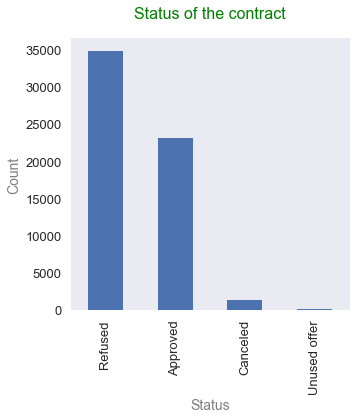

In [370]:
plt.figure(figsize=(5,5))
merged_app.NAME_CONTRACT_STATUS.value_counts().plot.bar()
plt.title('Status of the contract',color='green')
plt.xlabel('Status',color='grey')
plt.ylabel('Count',color='grey')
plt.show()

**SPLITTING THE CONTRACT STATUS INTO 4 PARTS**

In [291]:
approved=merged_app[merged_app.NAME_CONTRACT_STATUS=='Approved']
refused=merged_app[merged_app.NAME_CONTRACT_STATUS=='Refused']
canceled=merged_app[merged_app.NAME_CONTRACT_STATUS=='Canceled']
unused=merged_app[merged_app.NAME_CONTRACT_STATUS=='Unused Offer']

**We can see majority of loans has been refused (if we talk abouth the loans whose purpose is not XNA or XAP), let's check the purpose of loans which are majorly approved or refused**

**Majority of the loans which are approved does not have a specific purpose (It is either XNA or XAP)**

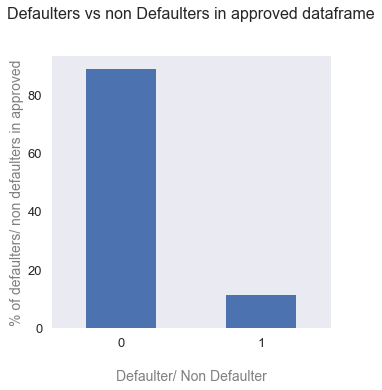

0    88.801733
1    11.198267
Name: TARGET, dtype: float64


In [382]:
plt.figure(figsize=(5,5))
(approved.TARGET.value_counts(normalize=True)*100).plot.bar()
plt.title('Defaulters vs non Defaulters in approved dataframe\n')
plt.xlabel('\nDefaulter/ Non Defaulter',color='grey')
plt.xticks(rotation=0)
plt.ylabel('% of defaulters/ non defaulters in approved',color='grey')
plt.show()
print(approved.TARGET.value_counts(normalize=True)*100)


**11% of the people whose loan was accepted has problems in payment **

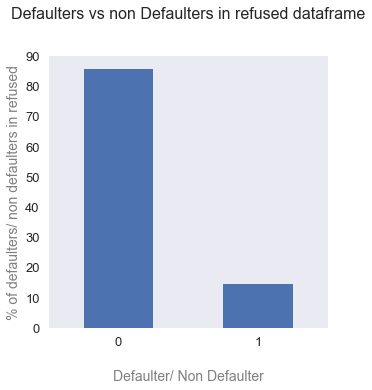

0    85.660898
1    14.339102
Name: TARGET, dtype: float64


In [383]:
plt.figure(figsize=(5,5))
(refused.TARGET.value_counts(normalize=True)*100).plot.bar()
plt.title('Defaulters vs non Defaulters in refused dataframe\n')
plt.xlabel('\nDefaulter/ Non Defaulter',color='grey')
plt.xticks(rotation=0)
plt.ylabel('% of defaulters/ non defaulters in refused',color='grey')
plt.show()
print(refused.TARGET.value_counts(normalize=True)*100)


**14% of the people whose loan was refused has problems in payment **

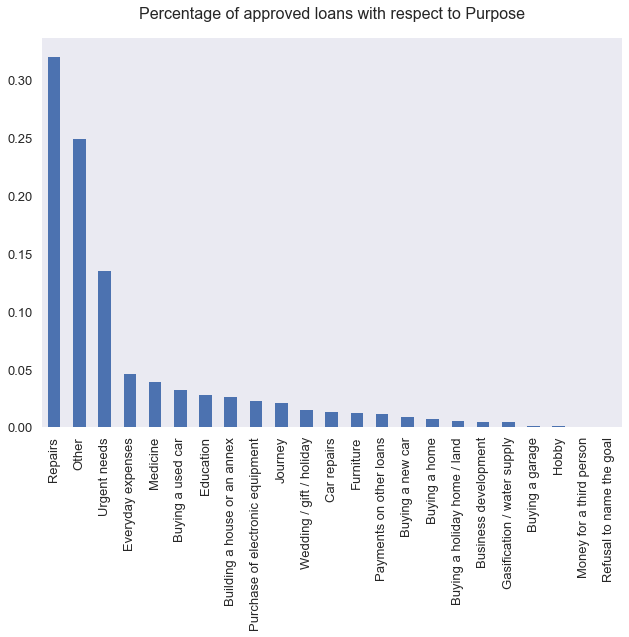

In [337]:
approved.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.bar()
plt.title('Percentage of approved loans with respect to Purpose')
plt.show()

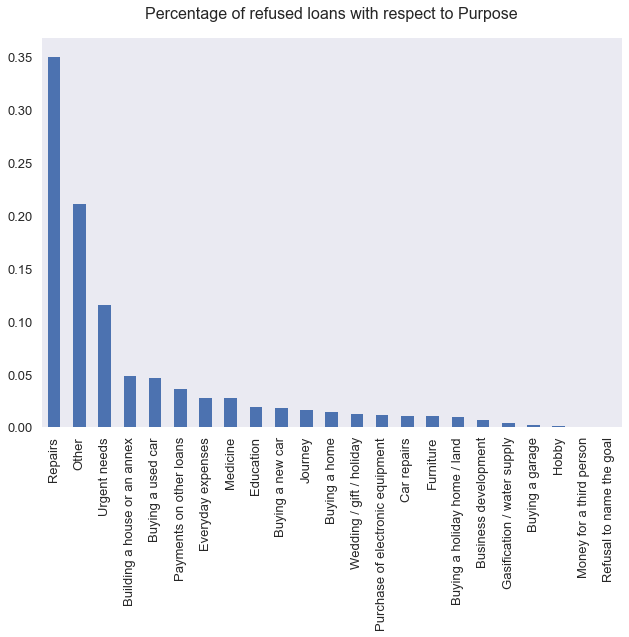

In [338]:
refused.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.bar()
plt.title('Percentage of refused loans with respect to Purpose')
plt.show()

**Most of the people take loans for repairment or they mention the purpose as repairs. Both the refused and approved loans has major reason as repairs as the data is highly biased or the people just select the repairs reason while applying for a loan more often**

Non Defaulters status

 Repeater     0.804950
New          0.145334
Refreshed    0.048999
XNA          0.000716
Name: NAME_CLIENT_TYPE, dtype: float64


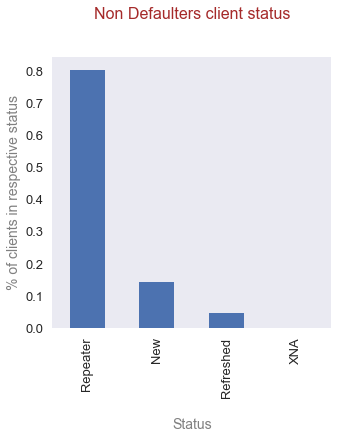




Defaulters status

 Repeater     0.817547
New          0.141233
Refreshed    0.040832
XNA          0.000388
Name: NAME_CLIENT_TYPE, dtype: float64


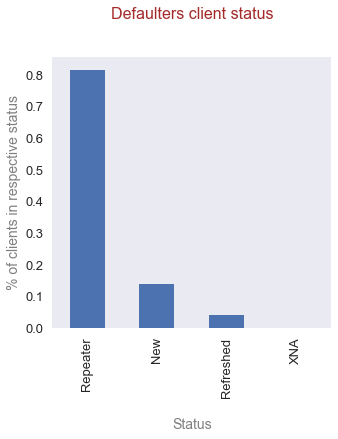

In [389]:
plt.figure(figsize=(5,5))
print('Non Defaulters status\n\n',merged_app.loc[merged_app.TARGET==0].NAME_CLIENT_TYPE.value_counts(normalize=True))
merged_app.loc[merged_app.TARGET==0].NAME_CLIENT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Non Defaulters client status\n',color='brown')
plt.xlabel('\nStatus',color='grey')
plt.ylabel('% of clients in respective status',color='grey')
plt.show()
print('\n\n')
plt.figure(figsize=(5,5))
print('Defaulters status\n\n',merged_app.loc[merged_app.TARGET==1].NAME_CLIENT_TYPE.value_counts(normalize=True))
merged_app.loc[merged_app.TARGET==1].NAME_CLIENT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Defaulters client status\n',color='brown')
plt.xlabel('\nStatus',color='grey')
plt.ylabel('% of clients in respective status',color='grey')
plt.show()

**We can see that in both defaulters and non-defaulters the new and repeater clients are almost equal so it is not neccessary that a new client will default or vice-versa**

Refused         64.452772
Approved        33.389327
Canceled         1.886549
Unused offer     0.271353
Name: NAME_CONTRACT_STATUS, dtype: float64


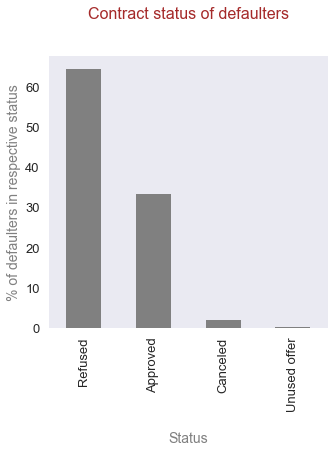

In [390]:
plt.figure(figsize=(5,5))
(merged_app.loc[merged_app.TARGET==1].NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot.bar(color='grey')
print(merged_app.loc[merged_app.TARGET==1].NAME_CONTRACT_STATUS.value_counts(normalize=True)*100)
plt.title('Contract status of defaulters\n',color='brown')
plt.xlabel('\nStatus',color='grey')
plt.ylabel('% of defaulters in respective status',color='grey')
plt.show()

Refused         57.665364
Approved        39.654372
Canceled         2.366761
Unused offer     0.313504
Name: NAME_CONTRACT_STATUS, dtype: float64


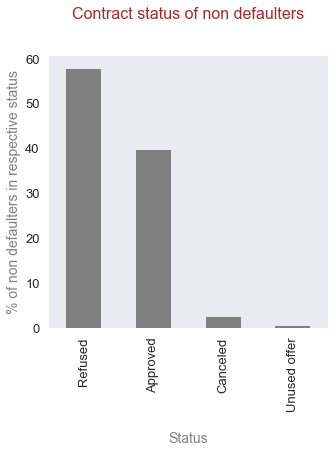

In [391]:
plt.figure(figsize=(5,5))
(merged_app.loc[merged_app.TARGET==0].NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot.bar(color='grey')
print(merged_app.loc[merged_app.TARGET==0].NAME_CONTRACT_STATUS.value_counts(normalize=True)*100)
plt.title('Contract status of non defaulters\n',color='brown')
plt.xlabel('\nStatus',color='grey')
plt.ylabel('% of non defaulters in respective status',color='grey')
plt.show()

**For 64% of the defaulters the loan was refused earlier**<br>
**While for ony 57% of the non defaulters the loan was refused earlier**